## Testing how runtime scales with number of phases in the composite

In [1]:
# Import necessary packages
import itertools
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
import time

# Custom imports
sys.path.insert(1, '../core')
from optimization import HashinShtrikman
from user_input import MaterialProperty, Material, MixtureProperty, Mixture

/Users/carlabecker/opt/anaconda3/envs/carla_mp_api/lib/python3.9/site-packages/mpcontribs/client/__init__.py:88: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [2]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("consolidated_dict_02_11_2024_23_45_58") as f:
    consolidated_dict = json.load(f)

In [3]:
# Define the number of trials
num_trials = 10

## 2 phase composite

In [4]:
# Example material matches for an n=2 phase compositie
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids}

In [5]:
# Need user input to create an HS instance
# Use same bounds for all materials
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=400, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=3, lower_bound=0.5),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [6]:
# Create an HS instance for testing
HS2 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:35:28,370 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:35:28,378 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:35:28,379 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [46]:
# Perform Optimizaztion several times to observe variation
HS2_times = []
for i in range(num_trials):
    start = time.time()
    HS2.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS2_time = end - start
    print(f'Trial {i}: {HS2_time} seconds')
    HS2_times.append(HS2_time)

Trial 0: 3.273725986480713 seconds
Trial 1: 3.820341110229492 seconds
Trial 2: 3.927623987197876 seconds
Trial 3: 3.521610975265503 seconds
Trial 4: 4.221944093704224 seconds
Trial 5: 3.5322751998901367 seconds
Trial 6: 3.7287917137145996 seconds
Trial 7: 3.949673891067505 seconds
Trial 8: 3.832214117050171 seconds
Trial 9: 3.8847758769989014 seconds


## 3 phase composite

In [8]:
# Example material matches for an n=3 phase compositie
mat_3_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}

In [9]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_3 = Material(name='mat_3', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [10]:
# Create an HS instance for testing
HS3 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:36:04,980 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:36:04,990 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:36:04,991 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [11]:
# Perform Optimizaztion several times to observe variation
HS3_times = []
for i in range(num_trials):
    start = time.time()
    HS3.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS3_time = end - start
    print(f'Trial {i}: {HS3_time} seconds')
    HS3_times.append(HS3_time)

Trial 0: 4.067321062088013 seconds
Trial 1: 3.406560182571411 seconds
Trial 2: 3.66562819480896 seconds
Trial 3: 4.104085922241211 seconds
Trial 4: 3.5086593627929688 seconds
Trial 5: 3.642841100692749 seconds
Trial 6: 3.566688060760498 seconds
Trial 7: 4.399397134780884 seconds
Trial 8: 3.375868797302246 seconds
Trial 9: 3.6181299686431885 seconds


## 4 phase composite

In [12]:
# Example material matches for an n=3 phase compositie
mat_4_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids}

In [13]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_4 = Material(name='mat_4', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [14]:
# Create an HS instance for testing
HS4 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:36:42,387 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:36:42,396 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:36:42,397 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [48]:
# Perform Optimizaztion several times to observe variation
HS4_times = []
for i in range(num_trials):
    start = time.time()
    HS4.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS4_time = end - start
    print(f'Trial {i}: {HS4_time} seconds')
    HS4_times.append(HS4_time)

Trial 0: 3.312390089035034 seconds
Trial 1: 5.494704961776733 seconds
Trial 2: 5.421726942062378 seconds
Trial 3: 3.7289319038391113 seconds
Trial 4: 4.094214200973511 seconds
Trial 5: 3.8555688858032227 seconds
Trial 6: 4.370764970779419 seconds
Trial 7: 3.998699188232422 seconds
Trial 8: 3.4812827110290527 seconds
Trial 9: 3.7165398597717285 seconds


## 5 phase composite

In [16]:
# Example material matches for an n=3 phase compositie
mat_5_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids, 'mat4': mat_4_ids, 'mat5': mat_5_ids}

In [17]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_5 = Material(name='mat_5', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [18]:
# Create an HS instance for testing
HS5 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:37:20,396 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:37:20,409 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:37:20,409 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [19]:
# Perform Optimizaztion several times to observe variation
HS5_times = []
for i in range(num_trials):
    start = time.time()
    HS5.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS5_time = end - start
    print(f'Trial {i}: {HS5_time} seconds')
    HS5_times.append(HS5_time)

Trial 0: 4.1691789627075195 seconds
Trial 1: 3.5567498207092285 seconds
Trial 2: 3.66107177734375 seconds
Trial 3: 3.655627727508545 seconds
Trial 4: 4.12381911277771 seconds
Trial 5: 3.5918240547180176 seconds
Trial 6: 3.6614129543304443 seconds
Trial 7: 3.8807480335235596 seconds
Trial 8: 3.7198851108551025 seconds
Trial 9: 3.7881600856781006 seconds


## 6 phase composite

In [20]:
# Example material matches for an n=3 phase compositie
mat_6_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids}

In [21]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_6 = Material(name='mat_6', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [22]:
# Create an HS instance for testing
HS6 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:37:58,276 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:37:58,291 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:37:58,293 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [23]:
# Perform Optimizaztion several times to observe variation
HS6_times = []
for i in range(num_trials):
    start = time.time()
    HS6.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS6_time = end - start
    print(f'Trial {i}: {HS6_time} seconds')
    HS6_times.append(HS6_time)

Trial 0: 3.9048328399658203 seconds
Trial 1: 3.8069345951080322 seconds
Trial 2: 3.6227970123291016 seconds
Trial 3: 4.657172918319702 seconds
Trial 4: 3.559019088745117 seconds
Trial 5: 5.3912200927734375 seconds
Trial 6: 5.2055113315582275 seconds
Trial 7: 3.3483588695526123 seconds
Trial 8: 3.801521062850952 seconds
Trial 9: 4.076388835906982 seconds


## 7 phase composite

In [24]:
# Example material matches for an n=3 phase compositie
mat_7_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids}

In [25]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_7 = Material(name='mat_7', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [26]:
# Create an HS instance for testing
HS7 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:38:39,731 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:38:39,740 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:38:39,741 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [27]:
# Perform Optimizaztion several times to observe variation
HS7_times = []
for i in range(num_trials):
    start = time.time()
    HS7.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS7_time = end - start
    print(f'Trial {i}: {HS7_time} seconds')
    HS7_times.append(HS7_time)

Trial 0: 3.8824779987335205 seconds
Trial 1: 3.650131940841675 seconds
Trial 2: 4.116564989089966 seconds
Trial 3: 3.7343969345092773 seconds
Trial 4: 3.831601858139038 seconds
Trial 5: 3.739542007446289 seconds
Trial 6: 4.096282958984375 seconds
Trial 7: 3.734452962875366 seconds
Trial 8: 3.6886017322540283 seconds
Trial 9: 3.9496612548828125 seconds


## 8 phase composite

In [28]:
# Example material matches for an n=3 phase compositie
mat_8_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids}

In [29]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_8 = Material(name='mat_8', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [30]:
# Create an HS instance for testing
HS8 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:39:18,242 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:39:18,256 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:39:18,257 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [31]:
# Perform Optimizaztion several times to observe variation
HS8_times = []
for i in range(num_trials):
    start = time.time()
    HS8.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS8_time = end - start
    print(f'Trial {i}: {HS8_time} seconds')
    HS8_times.append(HS8_time)

Trial 0: 4.208910942077637 seconds
Trial 1: 3.6359989643096924 seconds
Trial 2: 4.161623001098633 seconds
Trial 3: 3.701392889022827 seconds
Trial 4: 3.7492852210998535 seconds
Trial 5: 4.0338029861450195 seconds
Trial 6: 4.085848093032837 seconds
Trial 7: 3.7303202152252197 seconds
Trial 8: 3.92202091217041 seconds
Trial 9: 3.7942938804626465 seconds


## 9 phase composite

In [32]:
# Example material matches for an n=3 phase compositie
mat_9_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids}

In [33]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_9 = Material(name='mat_9', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [34]:
# Create an HS instance for testing
HS9 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:39:57,429 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:39:57,438 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:39:57,439 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [35]:
# Perform Optimizaztion several times to observe variation
HS9_times = []
for i in range(num_trials):
    start = time.time()
    HS9.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS9_time = end - start
    print(f'Trial {i}: {HS9_time} seconds')
    HS9_times.append(HS9_time)

Trial 0: 4.234461307525635 seconds
Trial 1: 3.5896401405334473 seconds
Trial 2: 3.986973285675049 seconds
Trial 3: 3.9943020343780518 seconds
Trial 4: 3.777092933654785 seconds
Trial 5: 3.942599058151245 seconds
Trial 6: 3.8081769943237305 seconds
Trial 7: 4.053854942321777 seconds
Trial 8: 3.797229051589966 seconds
Trial 9: 4.007138729095459 seconds


## 10 phase composite

In [36]:
# Example material matches for an n=3 phase compositie
mat_10_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
matches_dict = {'mat1': mat_1_ids, 
                'mat2': mat_2_ids, 
                'mat3': mat_3_ids, 
                'mat4': mat_4_ids, 
                'mat5': mat_5_ids, 
                'mat6': mat_6_ids,
                'mat7': mat_7_ids,
                'mat7': mat_7_ids,
                'mat8': mat_8_ids,
                'mat9': mat_9_ids,
                'mat10': mat_10_ids}

In [37]:
# Need user input to create an HS instance
# Use same bounds for all materials

# Create Material & Mixture instances
mat_10 = Material(name='mat_10', properties=properties_mat_1)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mat_4, mat_5, mat_6, mat_7, mat_8, mat_9, mat_10, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop

In [38]:
# Create an HS instance for testing
HS10 = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

2024-07-18 11:40:36,701 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-07-18 11:40:36,712 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-07-18 11:40:36,713 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


In [39]:
# Perform Optimizaztion several times to observe variation
HS10_times = []
for i in range(num_trials):
    start = time.time()
    HS10.set_HS_optim_params(gen_counter=False)
    end = time.time()
    HS10_time = end - start
    print(f'Trial {i}: {HS10_time} seconds')
    HS10_times.append(HS10_time)

Trial 0: 4.017874240875244 seconds
Trial 1: 4.031843185424805 seconds
Trial 2: 4.5209641456604 seconds
Trial 3: 3.9553029537200928 seconds
Trial 4: 4.172945022583008 seconds
Trial 5: 3.89159893989563 seconds
Trial 6: 4.710896730422974 seconds
Trial 7: 4.700551986694336 seconds
Trial 8: 3.9401369094848633 seconds
Trial 9: 3.960186004638672 seconds


## Compare runtimes

In [50]:
runtimes = np.array([HS2_times, 
            HS3_times, 
            HS4_times, 
            HS5_times, 
            HS6_times, 
            HS7_times, 
            HS8_times, 
            HS9_times, 
            HS10_times])
phases = np.arange(len(runtimes)) + 2

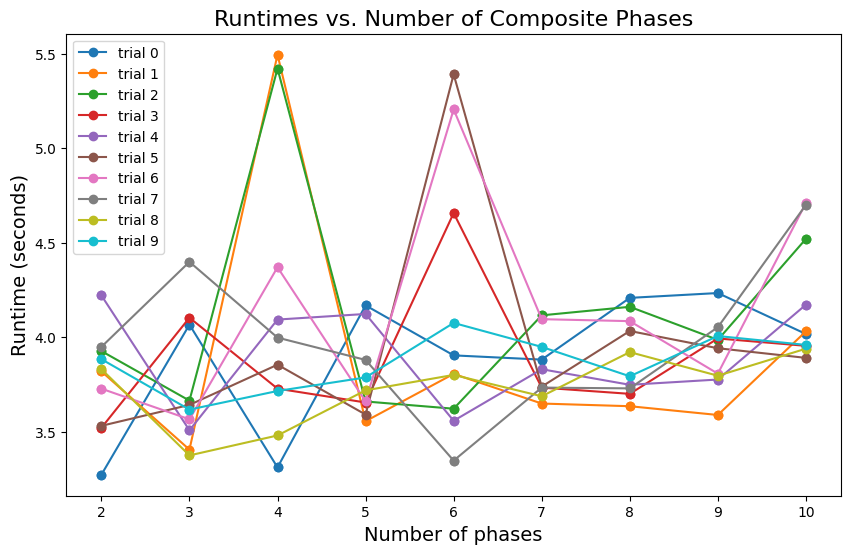

In [53]:
# Plot
plt.figure(figsize=(10, 6))

for i in range(num_trials):

    plt.plot(phases, runtimes[:, i], marker='o', linestyle='-', label=f'trial {i}')
    plt.scatter(phases, runtimes[:, i])

plt.xlabel('Number of phases', fontsize=14)
plt.ylabel('Runtime (seconds)', fontsize=14)
plt.title('Runtimes vs. Number of Composite Phases', fontsize=16)
plt.legend()

plt.show()

In [55]:
# Statistics
min_runtime = np.min(runtimes)
max_runtime = np.max(runtimes)
avg_runtime = np.mean(runtimes)
med_runtime = np.median(runtimes)

print(f'Min runtime: {min_runtime}')
print(f'Max runtime: {max_runtime}')
print(f'Average runtime: {avg_runtime}')
print(f'Median runtime: {med_runtime}')

Min runtime: 3.273725986480713
Max runtime: 5.494704961776733
Average runtime: 3.9360688341988457
Median runtime: 3.868158459663391
